In [1]:
import lyricsgenius as lg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spotipy
import time

from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from spotipy.oauth2 import SpotifyClientCredentials
from requests.exceptions import Timeout



In [2]:
# artists = ['Logic', 'Rihanna', 'Frank Sinatra']


# def get_lyrics(arr, k):  # Write lyrics of k songs by each artist in arr
#     c = 0  # Counter
#     for name in arr:
#         try:
#             songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
#             s = [song.lyrics for song in songs]
#             print("\n \n   <|endoftext|>   \n \n".join(s))  # Deliminator
#             c += 1
#             print(f"Songs grabbed:{len(s)}")
#         except:  #  Broad catch which will give us the name of artist and song that threw the exception
#             print(f"some exception at {name}: {c}")



In [3]:
all_top_songs = pd.read_excel('data/top_10000_songs_201129.xlsx', index_col=0) 

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
year_dis_song = all_top_songs.groupby('Year')['Song'].count()

In [5]:
cur_songs_start = 5000
cur_songs_end = 6000
current_songs = all_top_songs[cur_songs_start:cur_songs_end]

In [6]:
current_songs

,PLACE,Artist,Song,Year,PLACE08,PLACE11,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
ID,,,,,,,,,,,
1847,5001,The Rolling Stones,Emotional Rescue,1980,2860.0,NaN,NaN,NaN,NaN,4154.0,4189.0
6293,5002,Erasure,A Little Respect,1988,NaN,NaN,NaN,4451.0,4839.0,4941.0,5026.0
13519,5003,"Jim Europe's 369th Infantry ""Hellfighters"" Band",Memphis Blues,1919,NaN,NaN,NaN,NaN,NaN,6579.0,6669.0
5404,5004,Belle and Sebastian,"Step into My Office, Baby",2003,NaN,NaN,NaN,5844.0,NaN,4578.0,4647.0
5999,5005,Death Cab for Cutie,Soul Meets Body,2005,NaN,NaN,NaN,2824.0,3451.0,4606.0,4715.0
...,...,...,...,...,...,...,...,...,...,...,...
16589,5996,Amen Dunes,Believe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4541,5997,Badfinger,Without You,1970,NaN,NaN,2456.0,4295.0,NaN,6171.0,6235.0
6548,5998,Gerry and The Pacemakers,How Do You Do It?,1963,NaN,NaN,NaN,5331.0,3976.0,5981.0,6044.0


In [8]:
all_top_albums = pd.read_excel('data/top_3000_albums_201129.xls', index_col=0) 

In [9]:
year_dis_album = all_top_albums.groupby('Year')['Album'].count()

In [59]:

cur_album_start = 336
cur_album_end = 600
current_albums = all_top_albums[cur_album_start:cur_album_end]

In [60]:
current_albums

,PLACE,Artist,Album,Year,PLACE08,PLACE09,PLACE10,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
i,,,,,,,,,,,,
257,337.0,Deep Purple,Machine Head,1972,242.0,241.0,254.0,251.0,296.0,263.0,284.0,281.0
278,338.0,Al Green,Call Me,1973,255.0,268.0,290.0,264.0,294.0,313.0,331.0,325.0
5191,339.0,Fiona Apple,The Idler Wheel…,2012,NaN,NaN,NaN,630.0,579.0,555.0,509.0,560.0
1069,340.0,Moby,Play,1999,264.0,299.0,333.0,366.0,331.0,316.0,334.0,328.0
425,341.0,The Jam,All Mod Cons,1978,219.0,219.0,227.0,226.0,246.0,264.0,309.0,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2027,596.0,Steve Reich,Music for 18 Musicians,1978,665.0,594.0,635.0,619.0,692.0,734.0,664.0,620.0
674,597.0,R.E.M.,Lifes Rich Pageant,1986,712.0,668.0,703.0,742.0,535.0,523.0,585.0,589.0
4991,598.0,Dirty Projectors,Bitte Orca,2009,NaN,NaN,548.0,467.0,471.0,595.0,577.0,603.0


In [61]:
#Look at distribution of songs/albums over the years

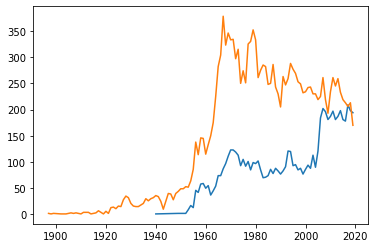

In [62]:
plt.plot(year_dis_album)
plt.plot(year_dis_song)
#orange = songs
#blue = albums

In [63]:
PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    

In [64]:
def make_dictionaries(parent, fileName):
    assert parent in PARENT_GENRES, "The passed name should be a in PARENT_GENRES"
    
    return_dict = {}
        
    f = open(fileName, "r")
    for line in f:
        if line.strip() != "Explore" and line.strip() !="\n" and line.strip() != "":
      
            child_genre = line.strip().lower()
            return_dict[child_genre] = parent
       
            
    return return_dict

        

In [65]:
pop_dict = make_dictionaries("pop", "./data/pop_children.txt")
rock_dict = make_dictionaries("rock", "./data/rock_children.txt")
hip_hop_dict = make_dictionaries("hip hop", "./data/hip_hop_children.txt")
blues_dict = make_dictionaries("blues", "./data/blues_children.txt")
classical_dict = make_dictionaries("classical", "./data/classical_children.txt")
easy_listening_dict = make_dictionaries("easy listening", "./data/easy_listening_children.txt")
edm_dict = make_dictionaries("edm", "./data/edm_children.txt")
folk_dict = make_dictionaries("folk", "./data/folk_children.txt")
jazz_dict = make_dictionaries("jazz", "./data/jazz_children.txt")
latin_dict = make_dictionaries("latin", "./data/latin_children.txt")
metal_dict = make_dictionaries("metal", "./data/metal_children.txt")
new_age_dict = make_dictionaries("new age", "./data/new_age_children.txt")
r_n_b_dict = make_dictionaries("r&b", "./data/r&b_children.txt")
country_dict = make_dictionaries("country", "./data/country_children.txt")
world_dict = make_dictionaries("world", "./data/world_children.txt")

all_genres_dict = {**pop_dict,**rock_dict, **hip_hop_dict, **blues_dict, **classical_dict, 
                   **easy_listening_dict, **edm_dict, **folk_dict, **jazz_dict, **latin_dict,
                  **metal_dict, **new_age_dict, **r_n_b_dict, **country_dict, **world_dict}

In [66]:
def getArtistGenre(genres):
    '''
    This takes a list of possible genres for an artist from the spotify API
    ex. ['adult standards', 'brill building pop', 'easy listening', 'lounge']
    If a parent genre is in the list it will return that as the genre
    Otherwise it will loop through the genres, and analyze the children genres
    The majority parent genre of the children genre will determine the returned genre
    ex. if 5 of 7 genres parent genre is rock, rock will be returned
    '''
    PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    
    returnGenre = ""
    
    #First check to see if a parent genre in list of spotify genres
    num_parents_in_genres = 0
    for g in genres:
        if g in PARENT_GENRES:
            returnGenre = g
            num_parents_in_genres+=1
            
    # Edge case two parent genres in a list (['dance pop', 'edm', 'pop', 'pop dance', 'pop rap'])
    # 1: count all of them and return the parent genre with most child genre
    
    if num_parents_in_genres == 1: #If only one parent genre included, return it
        return returnGenre
        
    #If a parent genre didn't show up OR more than one showed up count all genres
    genre_counts = {'pop':0, 
                    'rock':0, 
                    'hip hop':0, 
                    'latin': 0,
                    'edm': 0,
                    'r&b': 0,
                    'country': 0,
                    'folk': 0,
                    'classical': 0,
                    'metal': 0,
                    'jazz': 0,
                    'new age': 0,
                    'blues': 0,
                    'world': 0,
                    'easy listening': 0}
    
    
    for g in genres:
        try:
            parent = all_genres_dict[g]
            genre_counts[parent]+=1
        except:
            pass
        
    #TODO do we need to think about ties?
    max_genre = "no genre"
    max_genre_count = 0
    for p in PARENT_GENRES:
        if genre_counts[p] > max_genre_count:
            max_genre = p
            max_genre_count = genre_counts[p]
            
    returnGenre = max_genre
           
   
    return returnGenre
    
    

In [67]:
def getMostPopWord(lyrics):
    """
    Gets Called in count lyrics
    """

    text_tokens = word_tokenize(lyrics)
    lyrics_without_sw = [word for word in text_tokens if not word in stopwords.words()]
#     print(lyrics_without_sw)
    
    #I tried this. It seems to have some issues. For example, it converts 'us' to 'u'
    #This may not be the best option to get the most common words if the words aren't clearly recognizable
    
#     #Lemmatize the lyrics 
#     lmtzr = WordNetLemmatizer()
#     lem_lyrics = [[lmtzr.lemmatize(word) for word in word_tokenize(s)]
#               for s in lyrics_without_sw]
    
#     lem_lyrics_flat = []
#     for sublist in lem_lyrics:
#         lem_lyrics_flat.extend(sublist)
    
#     print(lem_lyrics_flat)
    
    c = Counter(lyrics_without_sw)
    return c.most_common(10)


def countLyrics(lyrics):
    """
    Takes in the output of 
    "\n \n   <|endoftext|>   \n \n".join([song.lyrics]))
    The first line is always the name of the song and the word lyrics
    There is always a number followed by embed on the last string
    Gets num lyrics, num unique lyrics, and specific word counts
    """
    
    #Remove the first line that has the title of the song and the word 'lyrics'
    split = lyrics.split("\n")
    del split[0]
    lyrics = "\n".join(split)
    
    pattern = r'\d*Embed'
    lyrics = re.sub(pattern, '', lyrics )
    
    pattern = r'You might also like'
    lyrics = re.sub(pattern, '', lyrics )

    
    #Convert to lower and remove non-alphnumeric chars
    lyrics = lyrics.lower()
    lyrics = re.sub(r'\W+', ' ', lyrics)   
    most_common_words = getMostPopWord(lyrics)
    
        
    #Parse most common words
    #get most common words (cw) and common word counts (cwc)
    try:
        cw1 = most_common_words[0][0]
        cw1c = most_common_words[0][1]
    except:
        cw1 = "NA"
        cw1c = 0
    
    try:
        cw2 = most_common_words[1][0]
        cw2c = most_common_words[1][1]
    except:
        cw2 = "NA"
        cw2c = 0
    
    try:
        cw3 = most_common_words[2][0]
        cw3c = most_common_words[2][1]
    except:
        cw3 = "NA"
        cw3c = 0
    
    try:
        cw4 = most_common_words[3][0]
        cw4c = most_common_words[3][1]
    except:
        cw4 = "NA"
        cw4c = 0
    
    try:
        cw5 = most_common_words[4][0]
        cw5c = most_common_words[4][1]
    except:
        cw5 = "NA"
        cw5c = 0
    
    try:
        cw6 = most_common_words[5][0]
        cw6c = most_common_words[5][1]
    except:
        cw6 = "NA"
        cw6c = 0
    
    try:
        cw7 = most_common_words[6][0]
        cw7c = most_common_words[6][1]
    except:
        cw7 = "NA"
        cw7c = 0
    
    try:
        cw8 = most_common_words[7][0]
        cw8c = most_common_words[7][1]
    except:
        cw8 = "NA"
        cw8c = 0
    
    try:
        cw9 = most_common_words[8][0]
        cw9c = most_common_words[8][1]
    except:
        cw9 = "NA"
        cw9c = 0
    
    try:
        cw10 = most_common_words[9][0]
        cw10c = most_common_words[9][1]
    except:
        cw10 = "NA"
        cw10c = 0
    

    #Count number of total lyrics and unique lyrics
    allWords = lyrics.split()
    num_unique = len(np.unique(allWords))
    total_words = len(allWords)
    

    #pattern matching
    
    #***************
    # LOVE
    #***************
    love_pattern = 'lov(e|ing|er|es|ely|ed)\\b'
    love_words = len(re.findall(love_pattern, lyrics))
    
    #***************
    # GOD
    #***************
    god_pattern = 'go(d|ds|ddes)\\b|jesus\\b|christ\\b'
    god_words = len(re.findall(god_pattern, lyrics))
    
    #***************
    # DANCE
    #***************
    dance_pattern = 'danc(e|es|ing|er)\\b'
    dance_words = len(re.findall(dance_pattern, lyrics))
    
    #***************
    # COOL
    #***************
    cool_pattern = 'coo(l|ler|lest)\\b'
    cool_words = len(re.findall(cool_pattern, lyrics))
    
    #***************
    # ROCK
    #***************
    rock_pattern = 'roc(k|ked|kers|ks|ker|king)\\b'
    rock_words = len(re.findall(rock_pattern, lyrics))
    
    #***************
    # SWEAR
    #***************
    swear_pattern = 'dam(n|ns|ned)\\b|fuc(k|ks|ked|ker|kers|king|kin)\\b|shi(t|ty|ts|ting|ter)\\b|hel(l|ls)\\b|bitc(h|hes|hen)\\b|bastar(d|ds)|as(s|es|shole|sholes)\\b'
    swear_words = len(re.findall(swear_pattern, lyrics))
    
    #***************
    # FAMILY
    #***************
    family_pattern = 'fa(m|mily|milies|)\\b|br(o|other|others)\\b|sis(ter|ters)\\b|so(n|ns)\\b|daugh(ter|ters)\\b|husban(d|ds)|wi(fe|ves)\\b|cousi(n|ns)\\b|uncl(e|es)\\b|aun(t|ts|ties)\\b'
    family_words = len(re.findall(family_pattern, lyrics))
    
    #***************
    # BABY
    #***************
    baby_pattern = 'ba(e|be|by|bies)\\b'
    baby_words = len(re.findall(baby_pattern, lyrics))
 

    #***************
    # MONEY
    #***************
    money_pattern = 'money\\b|cash\\b|doll(er|ers|a|az)\\b|buc(k|ks)\\b|coi(n|ns)\\b|bil(l|ls|lz)\\b'
    money_words = len(re.findall(money_pattern, lyrics))
    
    #***************
    # FUNKY
    #***************
    funky_pattern = 'fun(k|ky)\\b'
    funky_words = len(re.findall(funky_pattern, lyrics))
    
    #***************
    # CHILL
    #***************
    chill_pattern = 'chil(l|ls)\\b'
    chill_words = len(re.findall(chill_pattern, lyrics))
    
    
    
    
    
    return num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words,swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c
    
    
    

In [68]:
#Set up genius API
genius = lg.Genius('cPaJbcaz-llZE_G6jO_bHtcPFyJps_aiwumM5pF_xoPIBkmXHifU6lhHcOcbwOlY',  # Client access token from Genius Client API page
                             skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"],
                             remove_section_headers=True, verbose = True,
                             timeout=15, sleep_time=5, retries = 2)

# genius.sleep_time = 45


In [69]:
#Set up spotify API
cid = '2d2d4ac665f543db93244d6799fc01bc'
secret = '43cd8ad30758405fa3291b1b45e944fd'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [72]:
album_num=0
csv_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ ".csv"
csv_fail_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ "_fail.csv"

#csv of failed songs
l = open("./input_data/"+csv_fail_name, "w+")
header = "album|track|artist|year|id|reasonFail\n"
l.write(header)

#csv of completed songs
f = open("./input_data/"+csv_name, "w+")
header = "song|artist|year|genre|numUnique|totalWords|love_words|god_words|dance_words|cool_words|rock_words|swear_words|family_words|baby_words|money_words|funky_words|chill_words|cw1|cwc1|cw2|cwc2|cw3|cwc3|cw4|cwc4|cw5|cwc5|cw6|cwc6|cw7|cwc7|cw8|cwc8|cw9|cwc9|cw10|cwc10\n"
f.write(header)

#Write a row for each song 
for index, row in current_albums.iterrows():
    
    album_num+=1
    print("______________\n")
    cur_artist = row['Artist']
    cur_album = row['Album']
    cur_year = row['Year']
    cur_row = row['PLACE']
    cur_id = index
    print(f"Row: {cur_row}\nAlbum: {cur_album}\nArtist: {cur_artist}\n______________")


    
    #Genius api
    #Get num word, num unique, specific word counts etc.
    retries = 0
    while retries < 3:
        try:
            
            
            #Use genius API 
            print(f"Getting album. Attempt number {retries}")
            album = genius.search_album(cur_album, cur_artist)
            print("Got album")
        
            #Spotify api
            #Get Genre
            print(f"Getting genre list. Attempt number {retries}")
            results = sp.search(q=cur_artist, type='artist')
            items = results['artists']['items']
            print("Got genre list")
            
            if len(items) > 0:
                cur_artist_genre = getArtistGenre(items[0]['genres'])
            else:
                cur_artist_genre = "no genre"
                
            print(f"Got parent genre: {cur_artist_genre}")
            track = 0
            print("Looping tracks")
            for i in album.tracks:
                track +=1
                cur_lyrics = i.song.lyrics
                
                if len(cur_lyrics.split()) > 15:                    
                    num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words, swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c= countLyrics(cur_lyrics)
                    #If everything works. Write the line to the file
                    line = f"{cur_album}|{cur_artist}|{cur_year}|{cur_artist_genre}|{num_unique}|{total_words}|{love_words}|{god_words}|{dance_words}|{cool_words}|{rock_words}|{swear_words}|{family_words}|{baby_words}|{money_words}|{funky_words}|{chill_words}|{cw1}|{cw1c}|{cw2}|{cw2c}|{cw3}|{cw3c}|{cw4}|{cw4c}|{cw5}|{cw5c}|{cw6}|{cw6c}|{cw7}|{cw7c}|{cw8}|{cw8c}|{cw9}|{cw9c}|{cw10}|{cw10c}\n"
                    f.write(line)
                    
                else:
                    line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|too_few_lyrics\n"
                    l.write(line)
                    

        except Timeout as e:
            print(retries)
            retries += 1
            continue
            
        except ConnectionError as cr:
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
            l.write(line)
            
        except AssertionError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
        except AttributeError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
            
            
        
            


            
        break
        
    if retries >= 3: #If we time out 3 times, keep track and move on
        line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
        l.write(line)
        
f.close()
l.close()



______________

Row: 337.0
Album: Machine Head
Artist: Deep Purple
______________
Getting album. Attempt number 0
Searching for "Machine Head" by Deep Purple...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 338.0
Album: Call Me
Artist: Al Green
______________
Getting album. Attempt number 0
Searching for "Call Me" by Al Green...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 339.0
Album: The Idler Wheel…
Artist: Fiona Apple
______________
Getting album. Attempt number 0
Searching for "The Idler Wheel…" by Fiona Apple...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 340.0
Album: Play
Artist: Moby
______________
Getting album. Attempt number 0
Searching for "Play" by Moby...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: no genre
Looping

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 367.0
Album: Aquemini
Artist: OutKast
______________
Getting album. Attempt number 0
Searching for "Aquemini" by OutKast...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 368.0
Album: Return to Cookie Mountain
Artist: TV on the Radio
______________
Getting album. Attempt number 0
Searching for "Return to Cookie Mountain" by TV on the Radio...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 369.0
Album: Boy in da Corner
Artist: Dizzee Rascal
______________
Getting album. Attempt number 0
Searching for "Boy in da Corner" by Dizzee Rascal...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: edm
Looping tracks
______________

Row: 370.0
Album: In a Silent Way
Artist: Miles Davis
______________


Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 396.0
Album: Check Your Head
Artist: Beastie Boys
______________
Getting album. Attempt number 0
Searching for "Check Your Head" by Beastie Boys...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 397.0
Album: Tubular Bells
Artist: Mike Oldfield
______________
Getting album. Attempt number 0
Searching for "Tubular Bells" by Mike Oldfield...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: new age
Looping tracks
______________

Row: 398.0
Album: Music Has the Right to Children
Artist: Boards of Canada
______________
Getting album. Attempt number 0
Searching for "Music Has the Right to Children" by Boards of Canada...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: new age
Looping tracks
______________

Row: 399.0
Album: The Lexicon 

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 426.0
Album: Armed Forces
Artist: Elvis Costello and The Attractions
______________
Getting album. Attempt number 0
Searching for "Armed Forces" by Elvis Costello and The Attractions...
No results found for: 'Armed Forces Elvis Costello and The Attractions'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 427.0
Album: I Want to See the Bright Lights Tonight
Artist: Richard and Linda Thompson
______________
Getting album. Attempt number 0
Searching for "I Want to See the Bright Lights Tonight" by Richard and Linda Thompson...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 428.0
Album: Rocks
Artist: Aerosmith
______________
Getting album. Attempt number 0
Searching for "Rocks" by Aerosmith...
Got album
Getting genre list. Atte

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 456.0
Album: Liege and Lief
Artist: Fairport Convention
______________
Getting album. Attempt number 0
Searching for "Liege and Lief" by Fairport Convention...
No results found for: 'Liege and Lief Fairport Convention'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 457.0
Album: Run the Jewels 2
Artist: Run the Jewels
______________
Getting album. Attempt number 0
Searching for "Run the Jewels 2" by Run the Jewels...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 458.0
Album: Sandinista!
Artist: The Clash
______________
Getting album. Attempt number 0
Searching for "Sandinista!" by The Clash...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 459.0


______________

Row: 486.0
Album: Clandestino
Artist: Manu Chao
______________
Getting album. Attempt number 0
Searching for "Clandestino" by Manu Chao...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: world
Looping tracks
______________

Row: 487.0
Album: Titanic Rising
Artist: Weyes Blood
______________
Getting album. Attempt number 0
Searching for "Titanic Rising" by Weyes Blood...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 488.0
Album: You Forgot It in People
Artist: Broken Social Scene
______________
Getting album. Attempt number 0
Searching for "You Forgot It in People" by Broken Social Scene...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 489.0
Album: Sweet Baby James
Artist: James Taylor
______________
Getting album. Attempt number 0
Searching for "Sweet Baby James" by James Taylor...
Got album


Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 517.0
Album: You're Living All Over Me
Artist: Dinosaur Jr.
______________
Getting album. Attempt number 0
Searching for "You're Living All Over Me" by Dinosaur Jr....
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 518.0
Album: Genius of Modern Music (Volume One)
Artist: Thelonious Monk
______________
Getting album. Attempt number 0
Searching for "Genius of Modern Music (Volume One)" by Thelonious Monk...
No results found for: 'Genius of Modern Music (Volume One) Thelonious Monk'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 519.0
Album: Live and Dangerous
Artist: Thin Lizzy
______________
Getting album. Attempt number 0
Searching for "Live and Dangerous" by Thin Lizzy...
No results found for: 'Live and Dangerous Thin Li

______________

Row: 546.0
Album: Dirty Computer
Artist: Janelle Monáe
______________
Getting album. Attempt number 0
Searching for "Dirty Computer" by Janelle Monáe...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 547.0
Album: Buffalo Springfield Again
Artist: Buffalo Springfield
______________
Getting album. Attempt number 0
Searching for "Buffalo Springfield Again" by Buffalo Springfield...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 548.0
Album: Curtis
Artist: Curtis Mayfield
______________
Getting album. Attempt number 0
Searching for "Curtis" by Curtis Mayfield...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 549.0
Album: Low-Life
Artist: New Order
______________
Getting album. Attempt number 0
Searching for "Low-Life" by New Order...
Got album
Getting genre 

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 577.0
Album: Moby Grape
Artist: Moby Grape
______________
Getting album. Attempt number 0
Searching for "Moby Grape" by Moby Grape...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 578.0
Album: Silent Alarm
Artist: Bloc Party
______________
Getting album. Attempt number 0
Searching for "Silent Alarm" by Bloc Party...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 579.0
Album: Vulnicura
Artist: Björk
______________
Getting album. Attempt number 0
Searching for "Vulnicura" by Björk...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 580.0
Album: Hejira
Artist: Joni Mitchell
______________
Getting album. Attempt number 0
Searching for "Hejira" by Joni Mit